In [1]:
from __future__ import print_function

import os
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

Phone Accelerometer Train/test

In [2]:
columns=['user','activity','time','x','y','z']

data_phone_accel_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/accel'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/accel/'+filename , sep=",", header=None)
        #print(df)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_phone_accel_sum=pd.concat([data_phone_accel_sum,temp])

In [3]:
print(columns)

['user', 'activity', 'time', 'x', 'y', 'z']


In [4]:
data_phone_accel_sum['z'] = data_phone_accel_sum['z'].str.replace(';','')
data_phone_accel_sum['activity'].value_counts()
data_phone_accel_sum['x']=data_phone_accel_sum['x'].astype('float')
data_phone_accel_sum['y']=data_phone_accel_sum['y'].astype('float')
data_phone_accel_sum['z']=data_phone_accel_sum['z'].astype('float')
data_phone_accel_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804403 entries, 0 to 80869
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 256.6+ MB


In [5]:
data_phone_accel_sum

,user,activity,time,x,y,z
0,1631,A,1553872620859145,-3.231689,0.960129,1.223938
1,1631,A,1553872671213149,-3.688065,2.486359,2.971283
2,1631,A,1553872721567153,-2.923523,8.615723,5.365753
3,1631,A,1553872771921157,0.362640,16.023514,7.035049
4,1631,A,1553872822275160,-5.205841,7.684662,6.512863
...,...,...,...,...,...,...
80865,1610,S,17989031516129,5.946732,7.583008,-1.097260
80866,1610,S,17989081870133,5.818741,7.804871,-1.623733
80867,1610,S,17989132224137,5.530823,7.636093,-1.662643
80868,1610,S,17989182578141,5.802170,7.645752,-1.000412


Phone Gyro files import Train/test

In [6]:

data_phone_gyro_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/gyro'):
    for filename in filenames:
        df = pd.read_csv('wisdm/wisdm-dataset/wisdm-dataset/raw/phone/gyro/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_phone_gyro_sum=pd.concat([data_phone_gyro_sum,temp])

In [7]:
data_phone_gyro_sum['z'] = data_phone_gyro_sum['z'].str.replace(';','')

data_phone_gyro_sum['x']=data_phone_gyro_sum['x'].astype('float')
data_phone_gyro_sum['y']=data_phone_gyro_sum['y'].astype('float')
data_phone_gyro_sum['z']=data_phone_gyro_sum['z'].astype('float')

data_phone_gyro_sum['activity'].value_counts()
data_phone_gyro_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3608635 entries, 0 to 64251
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 192.7+ MB


Watch Gyro files import train/test

In [21]:

data_watch_gyro_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('/wisdm/wisdm-dataset/wisdm-dataset/raw/watch/gyro'):
    for filename in filenames:
        df = pd.read_csv('/wisdm/wisdm-dataset/wisdm-dataset/raw/watch/gyro/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_watch_gyro_sum=pd.concat([data_watch_gyro_sum,temp])

In [22]:
data_watch_gyro_sum['z'] = data_watch_gyro_sum['z'].str.replace(';','')
data_watch_gyro_sum['x']=data_watch_gyro_sum['x'].astype('float')
data_watch_gyro_sum['y']=data_watch_gyro_sum['y'].astype('float')
data_watch_gyro_sum['z']=data_watch_gyro_sum['z'].astype('float')

data_watch_gyro_sum['activity'].value_counts()
data_watch_gyro_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user      0 non-null      object 
 1   activity  0 non-null      object 
 2   time      0 non-null      object 
 3   x         0 non-null      float64
 4   y         0 non-null      float64
 5   z         0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 124.0+ bytes


# Watch accelorometer files import train test

In [32]:
data_watch_accel_sum = pd.DataFrame(data=None,columns=columns)
for dirname, _, filenames in os.walk('/wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel'):
    for filename in filenames:
        df = pd.read_csv('/wisdm/wisdm-dataset/wisdm-dataset/raw/watch/accel/'+filename , sep=",", header=None)
        temp=pd.DataFrame(data=df.values, columns=columns)
        data_watch_accel_sum=pd.concat([data_watch_accel_sum,temp])

In [33]:
data_watch_accel_sum['z'] = data_watch_accel_sum['z'].str.replace(';','')
data_watch_accel_sum['x']=data_watch_accel_sum['x'].astype('float')
data_watch_accel_sum['y']=data_watch_accel_sum['y'].astype('float')
data_watch_accel_sum['z']=data_watch_accel_sum['z'].astype('float')

data_watch_accel_sum['activity'].value_counts()
data_watch_accel_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user      0 non-null      object 
 1   activity  0 non-null      object 
 2   time      0 non-null      object 
 3   x         0 non-null      float64
 4   y         0 non-null      float64
 5   z         0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 124.0+ bytes


Combining Phone accel and gyro data

In [25]:
df_phone = pd.DataFrame(data=None, columns=columns)
df_phone['user']= data_phone_accel_sum['user'].head(3608635)
df_phone['activity']= data_phone_accel_sum['activity'].head(3608635)
df_phone['time']= data_phone_accel_sum['time'].head(3608635)

#df_phone['x'] = data_phone_gyro_sum['x'].head(766729).values + data_phone_accel_sum['x'].head(766729).values

df_phone['x'] = data_phone_gyro_sum['x'].values + data_phone_accel_sum['x'].head(3608635).values
df_phone['y'] = data_phone_gyro_sum['y'].values + data_phone_accel_sum['y'].head(3608635).values
df_phone['z'] = data_phone_gyro_sum['z'].values + data_phone_accel_sum['z'].head(3608635).values

In [26]:
a=data_phone_gyro_sum['x'].head(1).values + data_phone_accel_sum['x'].head(1).values

In [27]:
data_phone_accel_sum['x']

0       -3.231689
1       -3.688065
2       -2.923523
3        0.362640
4       -5.205841
           ...   
80865    5.946732
80866    5.818741
80867    5.530823
80868    5.802170
80869    6.026535
Name: x, Length: 4804403, dtype: float64

Combining watch acccel and gyro data

In [28]:
df_watch = pd.DataFrame(data=None, columns=columns)
df_watch['user']= data_watch_accel_sum['user'].head(3440342)
df_watch['activity']= data_watch_accel_sum['activity'].head(3440342)
df_watch['time']= data_watch_accel_sum['time'].head(3440342)
df_watch['x'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['x'].head(3440342).values
df_watch['y'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['y'].head(3440342).values
df_watch['z'] = data_watch_gyro_sum['x'].values + data_watch_accel_sum['z'].head(3440342).values

In [29]:
df_phone['activity'].value_counts()

activity
K    226143
H    210628
G    210562
A    209988
B    207039
L    206738
E    205145
M    200307
D    200133
P    199383
I    196903
O    196771
R    196533
S    191865
C    191203
J    190727
Q    186645
F    181922
Name: count, dtype: int64

In [ ]:
df_watch['activity'].value_counts()

Combining Phone and Watch Data

In [30]:
df_phone_watch = pd.DataFrame(data=None, columns=columns)
df_phone_watch['user']= df_phone['user'].head(3440342)
df_phone_watch['activity']= df_phone['activity'].head(3440342)
df_phone_watch['time']= df_phone['time'].head(3440342)
df_phone_watch['x'] = df_watch['x'].values + df_phone['x'].head(3440342).values
df_phone_watch['y'] = df_watch['y'].values + df_phone['y'].head(3440342).values
df_phone_watch['z'] = df_watch['z'].values + df_phone['z'].head(3440342).values

ValueError: operands could not be broadcast together with shapes (0,) (3440342,) 

In [ ]:
df_phone_watch.info()

In [ ]:
df_phone_watch['activity'].value_counts()

In [ ]:
Fs = 20

In [ ]:
activities = df_phone_watch['activity'].value_counts().index

In [ ]:
df_phone_watch = df_phone_watch.drop(['user', 'time'], axis=1)

In [ ]:
df_phone_watch['activity'].value_counts()

In [ ]:
df_a = df_phone_watch[df_phone_watch['activity']=='A'].head(174604)
df_m = df_phone_watch[df_phone_watch['activity']=='M'].head(174604)
df_k = df_phone_watch[df_phone_watch['activity']=='K'].head(174604)
df_p = df_phone_watch[df_phone_watch['activity']=='P'].head(174604)
df_e = df_phone_watch[df_phone_watch['activity']=='E'].head(174604)
df_o = df_phone_watch[df_phone_watch['activity']=='O'].head(174604)
df_c = df_phone_watch[df_phone_watch['activity']=='C'].head(174604)
df_d = df_phone_watch[df_phone_watch['activity']=='D'].head(174604)
df_l = df_phone_watch[df_phone_watch['activity']=='L'].head(174604)
df_b = df_phone_watch[df_phone_watch['activity']=='B'].head(174604)
df_h = df_phone_watch[df_phone_watch['activity']=='H'].head(174604)
df_f = df_phone_watch[df_phone_watch['activity']=='F'].head(174604)
df_g = df_phone_watch[df_phone_watch['activity']=='G'].head(174604)
df_q = df_phone_watch[df_phone_watch['activity']=='Q'].head(174604)
df_r = df_phone_watch[df_phone_watch['activity']=='R'].head(174604)
df_s = df_phone_watch[df_phone_watch['activity']=='S'].head(174604)
df_i = df_phone_watch[df_phone_watch['activity']=='I'].head(174604)
df_j = df_phone_watch[df_phone_watch['activity']=='J']

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([df_a,df_m,df_k,df_p,df_e,df_o,df_c,df_d,df_l,df_b,df_h,df_f,df_g,df_q,df_r,df_s,df_i,df_j]) 

In [ ]:
balanced_data['activity'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
balanced_data


In [ ]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity']) 
balanced_data

In [ ]:
label.classes_

**Statndardize Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

x = balanced_data[['x','y','z']]
y = balanced_data['label']
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y.values

scaled_x

In [ ]:
max(scaled_x['z'])

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(scaled_x[['x','y','z']])

x = pd.DataFrame(data=x, columns=['x','y','z'])
print(max(x['x']))
print(max(x['y']))
print(max(x['z']))


In [ ]:
scaled_x.to_csv('f1.csv', index=False)

In [ ]:
scaled_x

In [ ]:
dataframe = pd.read_csv("./f1.csv", header=None)

dataset = dataframe.values

kokot = pd.DataFrame(data=dataset, columns=['x','y','z','label'])

X = dataset[:, 0:3]   #inputs
#X = dataset[:,0:4]
Y = dataset[:,3]      #class (outputs)
#Y = int(Y) 


In [5]:
dataframe = pd.read_csv("../input/f120csv/f1_1-20.csv", header=None)
dataset = dataframe.values
final = pd.DataFrame(data=dataset, columns=['x','y','z','label'])

#################
dataframe1 = pd.read_csv("../input/f2130csv/f1_21-30.csv", header=None)
dataset1 = dataframe1.values
final1 = pd.DataFrame(data=dataset1, columns=['x','y','z','label'])


final = final.iloc[1: , :]
final1 = final1.iloc[1: , :]


x = final[['x','y','z']]
y = final['label'].astype('float')

x1 = final1[['x','y','z']]
y1 = final1['label'].astype('float')


x=x.astype(np.float)
x1=x1.astype(np.float)


scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y.values

scaled_x1 = pd.DataFrame(data=x1, columns=['x','y','z'])
scaled_x1['label'] = y1.values

x,y = get_frames(scaled_x, frame_size, hop_size)
x1,y1 = get_frames(scaled_x1, frame_size, hop_size)

x_train, y_train = x,y
x_test, y_test = x1,y1

x_train = x_train.reshape(x_train[:, :, :, np.newaxis].shape)
y_train = y_train.reshape(y_train[:, np.newaxis].shape)
x_test = x_test.reshape(x_test[:, :, :, np.newaxis].shape)
y_test = y_test.reshape(y_test[:, np.newaxis].shape)

**Frame Preparation**

In [4]:
import scipy.stats as stats
Fs=20
frame_size = Fs*4 #80
hop_size = Fs*2 #40

def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    frames = []
    labels = []
    for i in range(0,len(df )- frame_size, hop_size):
        x = df['x'].values[i: i+frame_size]
        y = df['y'].values[i: i+frame_size]
        z = df['z'].values[i: i+frame_size]
        
        #label = stats.mode(df['label'][i: i+frame_size])[0][0]
        label = min(df['label'][i: i+frame_size])
        #print(label)
        #print("************")
        #print(min(df['label'][i: i+frame_size]))
        frames.append([x,y,z])
        labels.append(label)
        
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    
    return frames, labels

In [ ]:
x,y = get_frames(scaled_x, frame_size, hop_size)

In [ ]:
 x.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 0)

In [ ]:
y_train.shape

In [ ]:
x_train.shape, x_test.shape

In [ ]:
x_train[0].shape, x_test[0].shape

In [ ]:
#x_train = x_train.reshape(55009, 80, 3,1)
#x_train = x_train.reshape(80, 3, 1)

#x_test = x_test.reshape(23576, 80, 3,1)
#x_test = x_test.reshape(80, 3,1)


In [ ]:
print(x_test.shape)

**2D CNN Model**

In [6]:
model = Sequential()
model.add(Conv2D(256, (2,2), activation = 'relu', input_shape = (80,3,1)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(18, activation='softmax'))


In [7]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

In [8]:
history = model.fit(x_train, y_train, epochs = 35,verbose=1)

Epoch 1/35
28286/28286 [==============================] - 20s 718us/step - loss: 2.1150 - accuracy: 0.3012
Epoch 2/35
28286/28286 [==============================] - 17s 594us/step - loss: 1.3843 - accuracy: 0.5430
Epoch 3/35
28286/28286 [==============================] - 17s 587us/step - loss: 1.0025 - accuracy: 0.6678
Epoch 4/35
28286/28286 [==============================] - 17s 595us/step - loss: 0.7677 - accuracy: 0.7468
Epoch 5/35
28286/28286 [==============================] - 17s 585us/step - loss: 0.6268 - accuracy: 0.7924
Epoch 6/35
28286/28286 [==============================] - 17s 594us/step - loss: 0.5243 - accuracy: 0.8268
Epoch 7/35
28286/28286 [==============================] - 16s 583us/step - loss: 0.4559 - accuracy: 0.8494
Epoch 8/35
28286/28286 [==============================] - 17s 599us/step - loss: 0.3885 - accuracy: 0.8715
Epoch 9/35
28286/28286 [==============================] - 17s 584us/step - loss: 0.3582 - accuracy: 0.8831
Epoch 10/35
28286/28286 [============

In [ ]:
x_train[0].shape

In [ ]:
111111111
from tensorflow.keras.utils import plot_model
import tensorflow
model = Sequential()
model.add(Conv2D(256, (2,2), activation = 'relu', input_shape = (80,3,1)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(18, activation='softmax'))
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 
tensorflow.keras.utils.plot_model(model,to_file='plot.png',show_shapes=True,show_layer_names=False)
#plot_model(model, to_file='model.png')
#model.get_config()

In [ ]:
#model.load_weights('../input/vlastnymodel/model.h5')
#model.load_weights('../input/model10/model10.h5')
model.load_weights('../input/vlastnymodel/model.h5')


In [ ]:
#model.get_config()

In [9]:
#model.save('./')
#model = keras.models.load_model('path/to/location')
prediction = model.predict(x_test)
print(x_test.shape)


(15001, 80, 3, 1)


In [10]:
y_pred=np.zeros((15001))
counter = 0
for i in prediction:
    o = np.argmax(i)
    #print(counter)
    y_pred[counter] = np.array(o)
    counter = counter +1
    #print(y_pred[i])
print(counter)

15001


In [ ]:
#model.save_weights('./model.h5')

In [ ]:
#model.load_weights('./model.h5')


In [ ]:
#for i in y_pred:
    #print(i)


In [ ]:
prediction.shape

In [11]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#print(cf_matrix)

In [14]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print('Počet epoch 35')

print(classification_report(y_test, y_pred, target_names=['chôdza', 'pomalý beh', 'chodenie po schodoch','sedenie', 'státie', 'písanie na PC','umývanie zubov', 'jedenie polievky', 'jedenie lupienkov','jedenie cestovín', 'pitie','jedenie sendviča', 'kopanie do lopty','chytanie tenisovej lopty', 'driblovanie', 'písanie rukou','tlieskanie', 'skladanie šiat']))


Classification Report

Počet epoch 35
                          precision    recall  f1-score   support

                  chôdza       0.20      0.18      0.19       834
              pomalý beh       0.70      0.26      0.38       835
    chodenie po schodoch       0.07      0.06      0.06       836
                 sedenie       0.07      0.09      0.08       833
                  státie       0.15      0.20      0.17       836
           písanie na PC       0.05      0.05      0.05       835
          umývanie zubov       0.04      0.03      0.04       834
        jedenie polievky       0.12      0.15      0.13       832
       jedenie lupienkov       0.05      0.04      0.05       836
        jedenie cestovín       0.04      0.05      0.05       831
                   pitie       0.05      0.03      0.03       836
        jedenie sendviča       0.10      0.08      0.09       832
        kopanie do lopty       0.16      0.09      0.12       831
chytanie tenisovej lopty       0.10 

Confusion matrix, without normalization


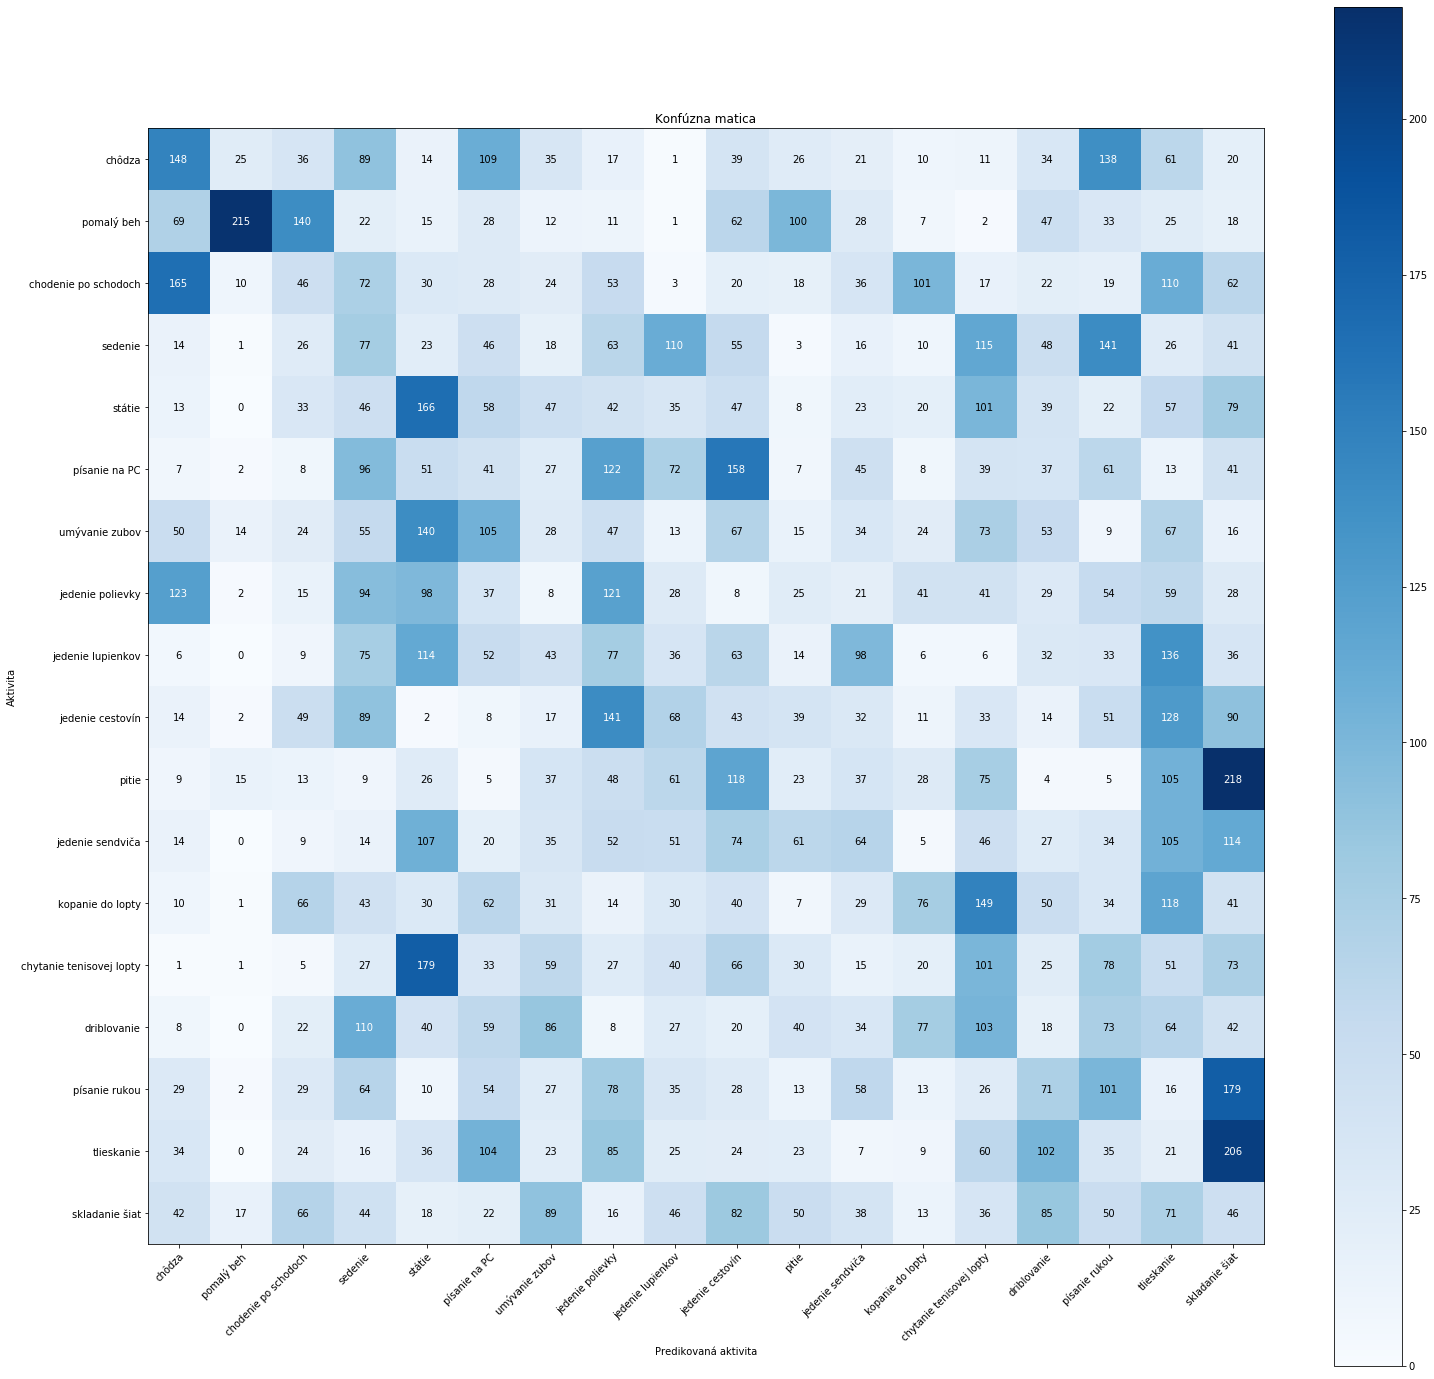

In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    #cm = confusion_matrix(y_true, y_pred)
    cm=metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['chôdza', 'pomalý beh', 'chodenie po schodoch','sedenie', 'státie', 'písanie na PC','umývanie zubov', 'jedenie polievky', 'jedenie lupienkov','jedenie cestovín', 'pitie','jedenie sendviča', 'kopanie do lopty','chytanie tenisovej lopty', 'driblovanie', 'písanie rukou','tlieskanie', 'skladanie šiat']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    
    fig, ax = plt.subplots(figsize=(25,25))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Aktivita',
           xlabel='Predikovaná aktivita')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
   

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    plt.savefig('plot.png')

    
    return ax


#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['chôdza', 'pomalý beh', 'chodenie po schodoch','sedenie', 'státie', 'písanie na PC','umývanie zubov', 'jedenie polievky', 'jedenie lupienkov','jedenie cestovín', 'pitie','jedenie sendviča', 'kopanie do lopty','chytanie tenisovej lopty', 'driblovanie', 'písanie rukou','tlieskanie', 'skladanie šiat'],
                      title='Konfúzna matica')

plt.show()

In [ ]:
keras.metrics.accuracy(y_test, y_pred)

In [ ]:
keras.metrics.sparse_categorical_accuracy(y_test, y_pred)